# **CNN Modelling**

**Drive Connection**

In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Importing Required Libraries**

In [2]:
# importing libraries 
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

**Loading Train-Validation-Test Datasets**

In [11]:
X_train = np.load('/content/drive/MyDrive/Google_colab/X_train.npy')
y_train = np.load('/content/drive/MyDrive/Google_colab/y_train.npy')
X_val = np.load('/content/drive/MyDrive/Google_colab/X_val.npy')
y_val = np.load('/content/drive/MyDrive/Google_colab/y_val.npy')
X_test = np.load('/content/drive/MyDrive/Google_colab/X_test.npy')
y_test = np.load('/content/drive/MyDrive/Google_colab/y_test.npy')

**Create a Model Object**

In [23]:
model = tf.keras.Sequential()

**Adding Convolution and Max Pooling Layers**

In [13]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32, 32, 1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Add more convolution and max pooling layers
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

**Model Compiling**

In [14]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Model Training**

In [15]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50
48/48 [==============================] - 17s 343ms/step - loss: 2.1762 - accuracy: 0.1747 - val_loss: 1.8949 - val_accuracy: 0.3664
Epoch 2/50
48/48 [==============================] - 14s 287ms/step - loss: 1.9071 - accuracy: 0.2803 - val_loss: 1.6102 - val_accuracy: 0.4183
Epoch 3/50
48/48 [==============================] - 13s 273ms/step - loss: 1.7338 - accuracy: 0.3658 - val_loss: 1.4284 - val_accuracy: 0.5229
Epoch 4/50
48/48 [==============================] - 15s 310ms/step - loss: 1.5675 - accuracy: 0.4360 - val_loss: 1.2523 - val_accuracy: 0.5603
Epoch 5/50
48/48 [==============================] - 14s 301ms/step - loss: 1.4324 - accuracy: 0.4923 - val_loss: 1.1380 - val_accuracy: 0.6328
Epoch 6/50
48/48 [==============================] - 14s 292ms/step - loss: 1.3322 - accuracy: 0.5293 - val_loss: 1.1051 - val_accuracy: 0.6275
Epoch 7/50
48/48 [==============================] - 13s 270ms/step - loss: 1.2724 - accuracy: 0.5542 - val_loss: 0.9884 - val_accuracy: 0.6718

**Loss vs Epoch Graph**

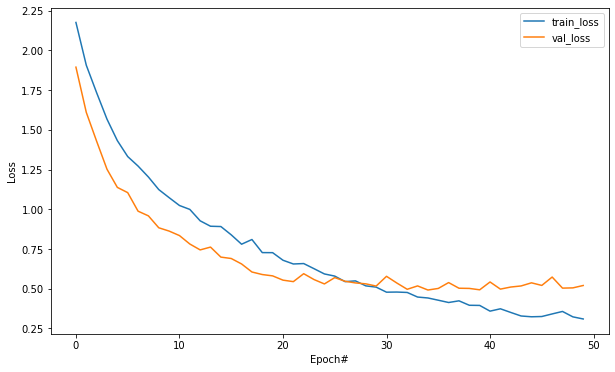

In [16]:
plt.figure(figsize=(10, 6))

# Plot the the training loss
plt.plot(results.history["loss"], label="train_loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")


# Name the x and y axises
plt.ylabel("Loss") 
plt.xlabel("Epoch#")

# Put legend table
plt.legend()

# Show the plot
plt.show()

**Accuracy vs Epoch Graph**

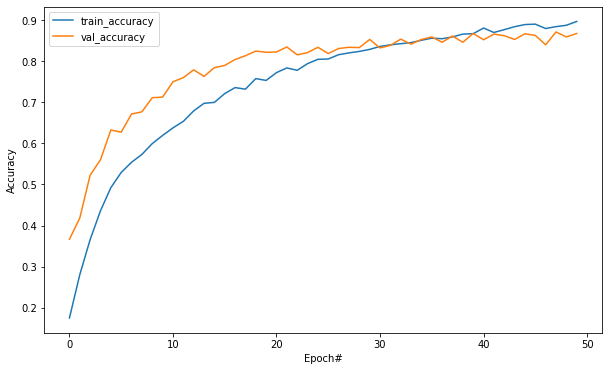

In [17]:
plt.figure(figsize=(10, 6))

# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="train_accuracy")


# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")


# Name the x and y axises
plt.ylabel("Accuracy") 
plt.xlabel("Epoch#")

# Put legend table
plt.legend()

# Show the plot
plt.show()

**Performance Evaluating**

In [18]:
# Evaluate the performance
model.evaluate(X_test, y_test)

41/41 [==============================] - 1s 18ms/step - loss: 0.5918 - accuracy: 0.8649


[0.5918341279029846, 0.8648855090141296]

**Prediction for Reshaped Sample**

In [19]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[100].reshape(1, 32, 32, 1))

# Print the prediction result
prediction_result

array([[1.7066227e-15, 6.1599031e-11, 1.6125465e-08, 3.4049677e-05,
        1.3255985e-10, 3.5340322e-10, 1.2092313e-14, 1.4076510e-18,
        9.9993622e-01, 2.9623045e-05]], dtype=float32)

**Finding Predicted Class and Probabilty**

In [20]:
# Find the predicted class
predicted_class = prediction_result.argmax()

# Find the prediction probability
predicted_probability = prediction_result.max()

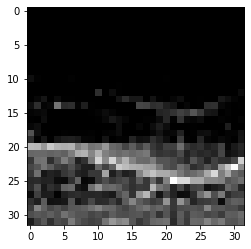

(32, 32)
This image belongs to class 8 with 0.9999362230300903 probability %
The actual class of the selected image is: [8]


In [22]:
plt.imshow(X_test[100], cmap="gray")
plt.show()

print(X_test[100].shape)

# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")
print(f"The actual class of the selected image is: {y_test[100]}")